Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading datasets



In [2]:
train = pd.read_csv('/AFRICA/Train.csv')
test = pd.read_csv('/AFRICA/Test.csv')

Print first 5 rows of the train dataset

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Number of rows and columns of train dataset

In [4]:
train.shape

(23524, 13)

Info about the train dataset

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Missing values by column

In [6]:
train.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Data Analysis

Statistical analysis

In [7]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


People with and without bank account

In [8]:
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

Data Visualization

In [9]:
sns.set()

Count plot of bank accounts

<Axes: xlabel='bank_account', ylabel='count'>

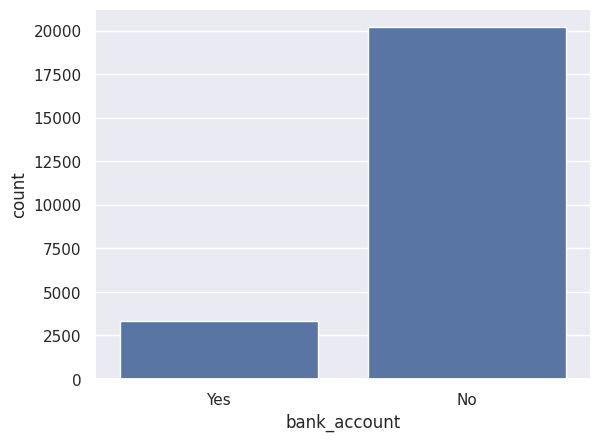

In [10]:
sns.countplot(x='bank_account', data=train)



Count plot of gender


<Axes: xlabel='gender_of_respondent', ylabel='count'>

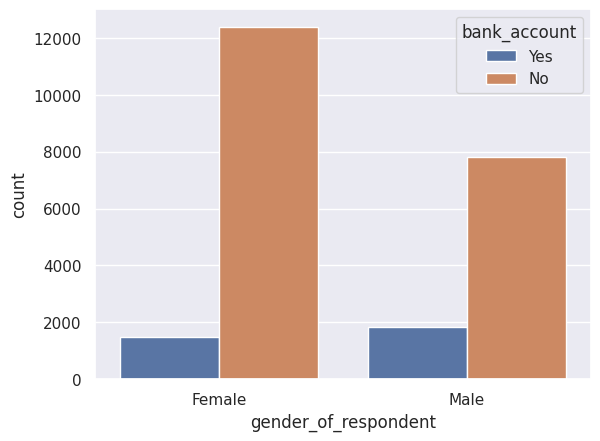

In [11]:
sns.countplot(x='gender_of_respondent', hue='bank_account',data=train)

Encoding categorical columns

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
# Drop 'year' column as it's not relevant for prediction
train.drop('year', axis=1, inplace=True)
test.drop('year', axis=1, inplace=True)

# Drop 'uniqueid' from features
train.drop('uniqueid', axis=1, inplace=True)
test_unique_ids = test['uniqueid']  # Store unique IDs for final output
test_countries = test['country']
test.drop('uniqueid', axis=1, inplace=True)

In [14]:
# Define categorical columns for encoding
categorical_columns = ['country', 'location_type', 'cellphone_access',
                       'gender_of_respondent', 'relationship_with_head',
                       'marital_status', 'education_level', 'job_type']

# Iterate through categorical columns and create encoders
for column in categorical_columns:
    # One-Hot Encoding
    one_hot_enc = OneHotEncoder(handle_unknown='ignore')
    train_encoded = one_hot_enc.fit_transform(train[[column]])
    test_encoded = one_hot_enc.transform(test[[column]])

    # Merge the encoded columns back to the dataframe
    train_encoded_df = pd.DataFrame(train_encoded.toarray(),
              columns=[f"{column}_{i}" for i in range(train_encoded.shape[1])],
                                    index=train.index)
    test_encoded_df = pd.DataFrame(test_encoded.toarray(),
            columns=[f"{column}_{i}" for i in range(test_encoded.shape[1])],
                                   index=test.index)

    train = pd.concat([train, train_encoded_df], axis=1)
    test = pd.concat([test, test_encoded_df], axis=1)

# Drop original categorical columns from train and test data
train.drop(categorical_columns, axis=1, inplace=True)
test.drop(categorical_columns, axis=1, inplace=True)

In [15]:
train.head()

,bank_account,household_size,age_of_respondent,country_0,country_1,country_2,country_3,location_type_0,location_type_1,cellphone_access_0,...,job_type_0,job_type_1,job_type_2,job_type_3,job_type_4,job_type_5,job_type_6,job_type_7,job_type_8,job_type_9
0,Yes,3,24,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,No,5,70,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Yes,5,26,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,No,5,34,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,No,8,26,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Features and Target

In [16]:
X_train = train.drop('bank_account', axis=1)
y_train = train['bank_account']  # Target variable

Model Trainig: Gradient Boosting Classifier

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier()
gbr.fit(X_train, y_train)
cross_val_score(gbr, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7226367670908251

In [18]:
param_grid = {
    'n_estimators': [100, 120, 150, 300],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 9]
}

In [19]:
from sklearn.model_selection import GridSearchCV

gbr2 = GridSearchCV(gbr, param_grid, cv=3, n_jobs=-1)

gbr2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 120, 150, 300]})

In [20]:
gbr2.best_params_

{'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 100}

In [21]:
gbr2.best_score_

0.8592076172432582

In [23]:
predictions = gbr2.predict(test)

In [24]:
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [25]:
# Create a dataframe for the predictions with unique IDs
predictions_df = pd.DataFrame({'unique_id': test_unique_ids, 'bank_account': predictions})

# Map 0s and 1s to 'No' and 'Yes' respectively
predictions_df['bank_account'] = predictions_df['bank_account'].map({'No': 0, 'Yes': 1})

# Append country name to unique_id column
predictions_df['unique_id'] = predictions_df['unique_id'] + ' x ' + test_countries

predictions_df['unique_id'].astype('str')

# Save the predictions to a CSV file
predictions_df.to_csv('PredictionsGBbest.csv', index=False)